**This notebook is for visualization of our updated Air Pollution dataset.**

In [ ]:
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from pandas import read_csv
from datetime import datetime
from keras.layers import Bidirectional
import datetime
import matplotlib.pyplot as plt
import pandas as pd



**Read the dataset for all the stations. Mean and error has been calculated for each station across different months.**

(36, 9)


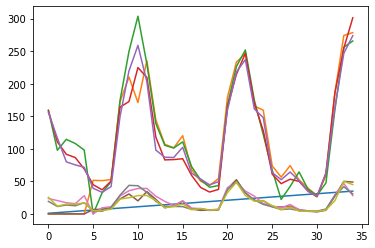

In [ ]:
#df= read_csv('data/appcpc/anand_vihar_15-20_p25_8h.csv', encoding = "ISO-8859-1") 
df= read_csv('data_new/PM2.5/All_PM2.5.csv', encoding = "ISO-8859-1")
df['date'] = pd.to_datetime(df['Date']) # date parse
# # df['Date'] = pd.to_datetime(city_day['Date'])
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(df["year"].min())
df['year'] = df['year'].values.astype(int)
df['PM2.5 Bawana'].astype(str).astype(np.float64)
df['PM2.5 Anand vihar'].astype(str).astype(np.float64)
df['PM2.5 Vivek Vihar'].astype(str).astype(np.float64)
df['PM2.5 DTU'].astype(str).astype(np.float64)
avg_val=np.zeros((36,9),dtype=np.float64)
# print(avg_val[0][2])
s=np.zeros((1,4),dtype=np.float64)
# print(s)
i=907
k=-1




months = ['Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018',
          'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018',
          'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019',
          'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019',
          'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020',
          'Jul 2020', 'Aug 2020', 'Sep 2020','Oct 2020', 'Nov 2020', 'Dec 2020'
         ]

target_mon = ['03', '04', '05', '06']


baw_list = [[] , [] , []]
anand_list = [[] , [] , []]
vivek_list = [[] , [] , []]
dtu_list = [[] , [] , []]

while(i<1982):
    
    m=df['Date'][i][3:5]
    y=df['Date'][i][6:]
    mon=df['Date'][i][3:5]
    j=i
    s[0][0]=0.0
    s[0][1]=0.0
    s[0][2]=0.0
    s[0][3]=0.0
    
    temp_k=0
    """
    while(j<1982):
      if(mon in target_mon1):
        baw_list[0].append(df['PM2.5 Bawana'][j])
        anand_list[0].append(df['PM2.5 Anand vihar'][j])
        vivek_list[0].append(df['PM2.5 Vivek Vihar'][j])
        dtu_list[0].append(df['PM2.5 DTU'][j])

      if(mon in target_mon2):
        baw_list[1].append(df['PM2.5 Bawana'][j])
        anand_list[1].append(df['PM2.5 Anand vihar'][j])
        vivek_list[1].append(df['PM2.5 Vivek Vihar'][j])
        dtu_list[1].append(df['PM2.5 DTU'][j])

      if(mon in target_mon3):
        baw_list[2].append(df['PM2.5 Bawana'][j])
        anand_list[2].append(df['PM2.5 Anand vihar'][j])
        vivek_list[2].append(df['PM2.5 Vivek Vihar'][j])
        dtu_list[2].append(df['PM2.5 DTU'][j])

      mon=df['Date'][j][3:5]
      j=j+1  """


    while(mon==m and j<1982): 
        s[0][0]+=df['PM2.5 Bawana'][j]
        s[0][1]+=df['PM2.5 Anand vihar'][j]
        s[0][2]+=df['PM2.5 Vivek Vihar'][j]
        s[0][3]+=df['PM2.5 DTU'][j]
        if(mon in target_mon and y == '2018'):
          baw_list[0].append(df['PM2.5 Bawana'][j])
          anand_list[0].append(df['PM2.5 Anand vihar'][j])
          vivek_list[0].append(df['PM2.5 Vivek Vihar'][j])
          dtu_list[0].append(df['PM2.5 DTU'][j])

        if(mon in target_mon and y == '2019'):
          baw_list[1].append(df['PM2.5 Bawana'][j])
          anand_list[1].append(df['PM2.5 Anand vihar'][j])
          vivek_list[1].append(df['PM2.5 Vivek Vihar'][j])
          dtu_list[1].append(df['PM2.5 DTU'][j])

        if(mon in target_mon and y == '2020'):
          baw_list[2].append(df['PM2.5 Bawana'][j])
          anand_list[2].append(df['PM2.5 Anand vihar'][j])
          vivek_list[2].append(df['PM2.5 Vivek Vihar'][j])
          dtu_list[2].append(df['PM2.5 DTU'][j])


        mon=df['Date'][j][3:5]
        j=j+1
        i=j
        temp_k+=1
        
    k=k+1
#     print("iiiiiii=",i)
#     print("k=====",k)
    avg_val[k][0]=k
    avg_val[k][1]=s[0][0]/temp_k
    avg_val[k][2]=s[0][1]/temp_k
    avg_val[k][3]=s[0][2]/temp_k
    avg_val[k][4]=s[0][3]/temp_k
    avg_val[k][5]=1.96*(np.std(np.array(df['PM2.5 Bawana'][i-temp_k:i]))/np.sqrt(temp_k))
    avg_val[k][6]=1.96*(np.std(np.array(df['PM2.5 Anand vihar'][i-temp_k:i]))/np.sqrt(temp_k))
    avg_val[k][7]=1.96*(np.std(np.array(df['PM2.5 Vivek Vihar'][i-temp_k:i]))/np.sqrt(temp_k))
    avg_val[k][8]=1.96*(np.std(np.array(df['PM2.5 DTU'][i-temp_k:i]))/np.sqrt(temp_k))
    
#     k=k+1
    
print(avg_val.shape)
pyplot.figure()
pyplot.plot((avg_val[:][1:]))

In [ ]:
avg_val[0,3] = 0.0
avg_val[0,7] = 0.0
cols=['PM2.5 Bawana','PM2.5 Anand vihar','PM2.5 Vivek Vihar','PM2.5 DTU','Err BW','Err AV','Err VV','Err DTU']
avg_df= pd.DataFrame(data=avg_val[0:,1:],index=avg_val[0:,0], columns=cols)
avg_df['months']=months
avg_df.head(10)

,PM2.5 Bawana,PM2.5 Anand vihar,PM2.5 Vivek Vihar,PM2.5 DTU,Err BW,Err AV,Err VV,Err DTU,months
0.0,0.000000,259.521875,0.000000,273.616875,0.000000,32.515569,0.000000,30.858880,Jan 2018
1.0,0.000000,159.403571,158.194643,155.876071,0.000000,23.643091,19.246089,25.369133,Feb 2018
2.0,0.000000,97.771290,110.457419,116.406452,0.000000,20.477121,11.417376,11.892274,Mar 2018
3.0,0.000000,114.543667,91.561000,79.994000,0.000000,17.141106,13.674983,15.050522,Apr 2018
4.0,0.000000,108.096129,86.566129,75.260968,0.000000,15.734762,12.540266,14.793574,May 2018
5.0,0.000000,98.054667,69.023667,71.601667,0.000000,27.971598,17.202870,17.096118,Jun 2018
6.0,51.581290,0.000000,44.845806,39.334516,6.661111,0.000000,4.905785,4.966403,Jul 2018
7.0,51.081613,32.471613,37.039032,33.130323,7.061709,9.431541,4.121059,5.184255,Aug 2018
8.0,52.726333,49.611000,50.376333,41.984000,8.926083,10.980435,9.971034,7.122701,Sep 2018
9.0,172.044194,174.321290,163.898065,149.569677,23.036831,27.592672,28.845696,22.851269,Oct 2018


**Plot for Jan, 2018 to Dec,2020**

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=avg_df['months'],
                y=avg_df['PM2.5 Bawana'],
                     error_y=dict(type='data', array=np.array(avg_df['Err BW'])),
                name='Bawana',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=avg_df['months'],
                y=avg_df['PM2.5 Anand vihar'],
                error_y=dict(type='data', array=np.array(avg_df['Err AV'])),
                name='Anand Vihar',
                marker_color='rgb(0,125,150)'
                ))
fig.add_trace(go.Bar(x=avg_df['months'],
                y=avg_df['PM2.5 DTU'],
                error_y=dict(type='data', array=np.array(avg_df['Err DTU'])),
                name='DTU',
                marker_color='rgb(13, 255, 20)'
                ))
fig.add_trace(go.Bar(x=avg_df['months'],
                y=avg_df['PM2.5 Vivek Vihar'],
                error_y=dict(type='data', array=np.array(avg_df['Err VV'])),
                name='Vivek Vihar',
                marker_color='rgb(255, 10, 10)'
                ))

fig.update_layout(
    title='PM2.5 values for Delhi\'s most polluted areas' ,
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='PM2.5(u/gm3)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1,# gap between bars of the same location coordinate.
    shapes=[
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="Jun 2020",
            y0=0,
            x1="Mar 2020",
            y1=1,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        ),
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="Jan 2018",
            y0=0,
            x1="Mar 2020",
            y1=1,
            #fillcolor="white",
            opacity=0.5,
            layer="below",
            line_width=0,
        ),
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="Jun 2020",
            y0=0,
            #x1="Dec 2020",
            x1 = 35.4, 
            y1=1,
            fillcolor="violet",
            opacity=0.5,
            layer="below",
            line_width=0,
        )
    ],
    annotations=[
        dict(
            x=27.5,
            y=232,
            xref="x",
            yref="y",
            text="COVID-19",
#             family="sans serif",
            showarrow=False
        ),
        dict(
            x=27.5,
            y=216,
            xref="x",
            yref="y",
            text="Lockdown",
#             family="sans serif",
            showarrow=False
        ),
        dict(
            x=15.5,
            y=275,
            xref="x",
            yref="y",
            text="Pre COVID-19 Lockdown",
#             family="sans serif",
            showarrow=False
        ),
        dict(
            x= 31.5,
            y=275,
            xref="x",
            yref="y",
            text="Partial Lockdown",
#             family="sans serif",
            showarrow=False
        )
    ]
)
fig.show()

**PM2.5 analysis for different stations for March-June(2018,2019,2020)**

In [ ]:
cols=['year','PM2.5 Bawana','PM2.5 Anand vihar','PM2.5 Vivek Vihar','PM2.5 DTU','Err BW','Err AV','Err VV','Err DTU']
years = ['Mar-Jun,2018' , 'Mar-Jun,2019' , 'Mar-Jun,2020']
avg_years = pd.DataFrame(columns=cols)
avg_years['year']= years
baw_mean = np.array([np.mean(baw_list[0]) , np.mean(baw_list[1]) , np.mean(baw_list[2])])
anand_mean = np.array([np.mean(anand_list[0]) , np.mean(anand_list[1]) , np.mean(anand_list[2])])
vivek_mean = np.array([np.mean(vivek_list[0]) , np.mean(vivek_list[1]) , np.mean(vivek_list[2])])
dtu_mean = np.array([np.mean(dtu_list[0]) , np.mean(dtu_list[1]) , np.mean(dtu_list[2])])
avg_years['PM2.5 Bawana']= baw_mean
avg_years['PM2.5 Anand vihar']= anand_mean
avg_years['PM2.5 Vivek Vihar']= vivek_mean
avg_years['PM2.5 DTU']= dtu_mean
baw_err = np.array([1.96*(np.std(np.array(baw_list[0]))/np.sqrt(len(baw_list[0]))) , 1.96*(np.std(np.array(baw_list[1]))/np.sqrt(len(baw_list[1])))
, 1.96*(np.std(np.array(baw_list[2]))/np.sqrt(len(baw_list[2])))])

anand_err = np.array([1.96*(np.std(np.array(anand_list[0]))/np.sqrt(len(anand_list[0]))) , 1.96*(np.std(np.array(anand_list[1]))/np.sqrt(len(anand_list[1])))
, 1.96*(np.std(np.array(anand_list[2]))/np.sqrt(len(anand_list[2])))])

vivek_err = np.array([1.96*(np.std(np.array(vivek_list[0]))/np.sqrt(len(vivek_list[0]))) , 1.96*(np.std(np.array(vivek_list[1]))/np.sqrt(len(vivek_list[1])))
, 1.96*(np.std(np.array(vivek_list[2]))/np.sqrt(len(vivek_list[2])))])

dtu_err = np.array([1.96*(np.std(np.array(dtu_list[0]))/np.sqrt(len(dtu_list[0]))) , 1.96*(np.std(np.array(dtu_list[1]))/np.sqrt(len(dtu_list[1])))
, 1.96*(np.std(np.array(dtu_list[2]))/np.sqrt(len(dtu_list[2])))])

avg_years['Err BW']= baw_err
avg_years['Err AV']= anand_err
avg_years['Err VV']= vivek_err
avg_years['Err DTU']= dtu_err

avg_years.head()

,year,PM2.5 Bawana,PM2.5 Anand vihar,PM2.5 Vivek Vihar,PM2.5 DTU,Err BW,Err AV,Err VV,Err DTU
0,"Mar-Jun,2018",0.000000,104.588852,89.551393,85.980000,0.000000,10.473963,7.391551,8.052123
1,"Mar-Jun,2019",99.384508,97.618443,77.653852,84.805574,7.405179,8.479847,5.588515,6.134629
2,"Mar-Jun,2020",64.314754,49.114918,52.783770,57.937295,5.436520,6.451974,4.076337,4.743455


In [ ]:
avg_years.to_csv('Mar_Jun_PM2.5_trend.csv')